In [57]:
from numpy.random import randn
from matplotlib import pyplot as plt
%matplotlib inline

## 8.1 matplotlib API

### 8.1.1 Figure와 서브플롯

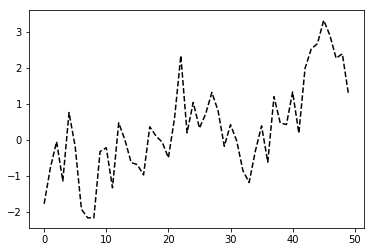

In [58]:
plt.plot(randn(50).cumsum(), 'k--')

여러개의 서브플롯 생성

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111d98f60>,
      dtype=object)

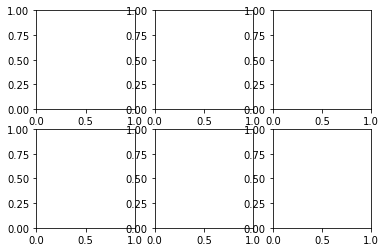

In [59]:
fig, axes = plt.subplots(2,3)
axes

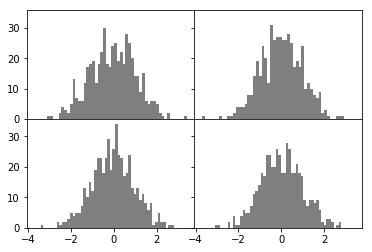

In [60]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500), bins=50, color='k', alpha=0.5)

plt.subplots_adjust(wspace=0, hspace=0)

pyplot.subplots options 참고 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html 

### 8.1.2 색상, 마커, 선 스타일

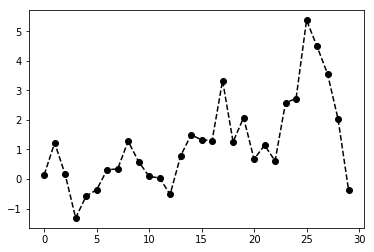

In [61]:
plt.plot(randn(30).cumsum(), 'ko--')

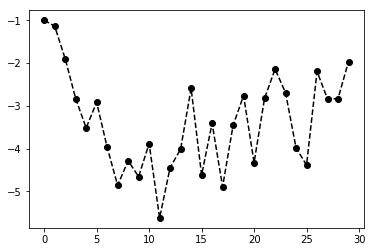

In [62]:
# 위와 결과는 동일하나 명식적인 표현
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

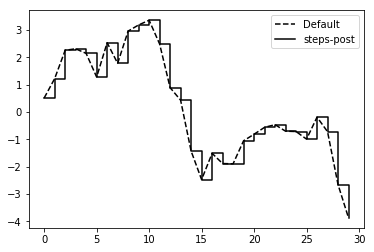

In [63]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### 8.1.3 눈금,라벨,범례

제목 축 이름, 눈금 이름 설정

Text(0.5,0,'Stages')

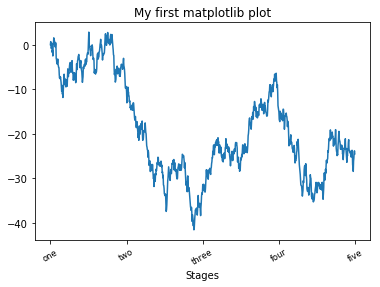

In [64]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())
# 눈금변경(set_xticks, set_xticklabels)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

범례 추가하기

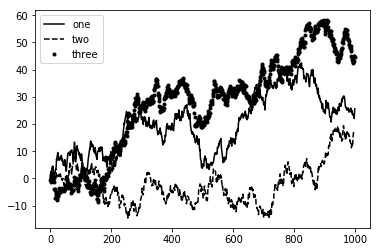

In [65]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best') # 그려진 그래프에 방해받지 않고 최적의 위치에 범례 표시 옵션

### 8.1.4 주석과 그림 추가

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

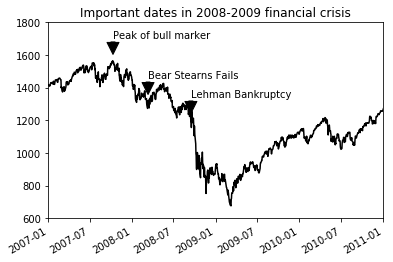

In [66]:
import pandas as pd
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007,10,11), 'Peak of bull marker'),
    (datetime(2008,3,12), 'Bear Stearns Fails'),
    (datetime(2008,9,15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+50), xytext=(date, spx.asof(date)+200), arrowprops=dict(facecolor='black'), horizontalalignment='left', verticalalignment='top')
    

# 2007-2010 구간 확대
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600,1800])
ax.set_title('Important dates in 2008-2009 financial crisis')

### 8.1.5 그래프를 파일로 저장

In [67]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

## 8.2 pandas에서 그래프 그리기

### 8.2.1 선 그래프

In [68]:
import numpy as np

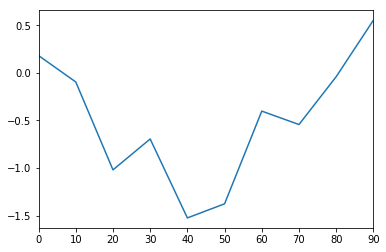

In [69]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

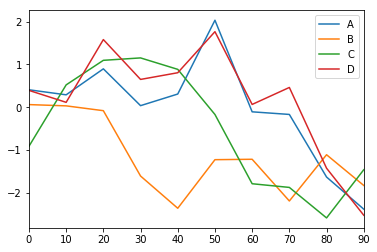

In [70]:
# dataframe으로 그래프 그릴경우 컬럼별로 선 그래프를 그리고 자동적으로 범례를 생성
df = pd.DataFrame(np.random.randn(10,4).cumsum(0), columns=['A','B','C','D'], index=np.arange(0,100,10))
df.plot()

참고(Series.plot) : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html

참고(DataFrame plot) : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html 

### 8.2.2 막대 그래프

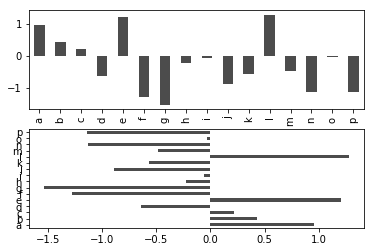

In [71]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [72]:
df = pd.DataFrame(np.random.rand(6,4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.174264,0.749278,0.122530,0.993544
two,0.495110,0.575811,0.631790,0.133256
three,0.375262,0.901960,0.894708,0.809503
four,0.925962,0.417704,0.225713,0.810255
five,0.656818,0.060078,0.551072,0.225224
six,0.505753,0.038480,0.224446,0.412744


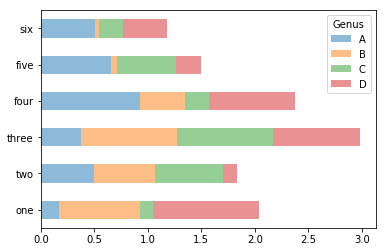

In [73]:
df.plot(kind='barh', stacked=True, alpha=0.5)

### 8.2.3 히스토그램과 밀도 그래프

In [74]:
tips = pd.read_csv('ch08/tips.csv')

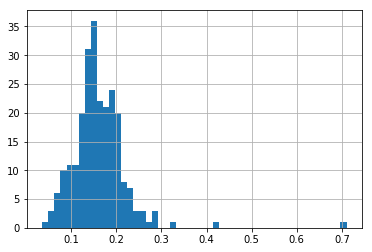

In [75]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

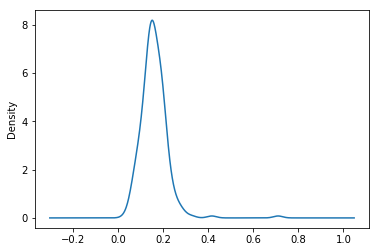

In [76]:
# 밀도 그래프
tips['tip_pct'].plot(kind='kde')

/Users/macbook/.python_env/mydjango-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


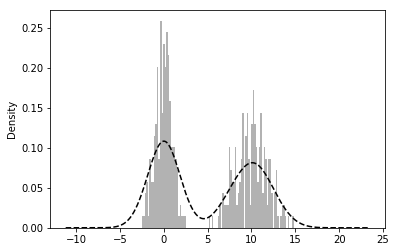

In [77]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### 8.2.4 산포도

In [78]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 vs. log unemp')

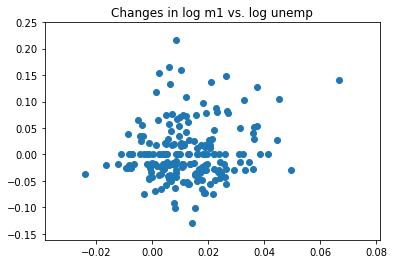

In [79]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' %('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114763128>,
      dtype=object)

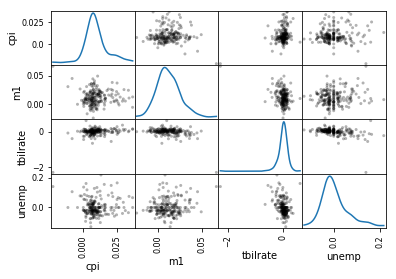

In [80]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## 8.3 지도 그리기: 아이티 지진 데이터 시각화

In [81]:
data = pd.read_csv('ch08/Haiti.csv')
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO


In [82]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [83]:
# 누락된 정보 제거
data.describe()
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) & (data.LONGITUDE > -75) & (data.LONGITUDE < -70) & data.CATEGORY.notnull()]

In [84]:
# 시각화
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [85]:
get_english('2. Ungences logistiques | Vital Lines')

('2', 'Vital Lines')

In [86]:
all_cats = get_all_categories(data.CATEGORY)
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']
english_mapping['6c']

'Earthquake and aftershocks'

In [87]:
# 더미 컬럼을 카테고리 별로 추가
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = pd.DataFrame(np.zeros((len(data), len(code_index))), index=data.index, columns=code_index)

In [88]:
dummy_frame.iloc[:, :6]

,1,1a,1b,1c,1d,2
0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row, codes] = 1
    
data = data.join(dummy_frame.add_prefix('category_'))

In [90]:
# import error
from mpl_toolkits.basemap import Basemap
def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    m = Basemap(ax=ax, projection='stere', lon_0=(urlon+lllon) / 2, lat_0=(urlat + lllat) / 2, llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=urlon, resolution='f')
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

TypeError: input must be an array, list, tuple or scalar

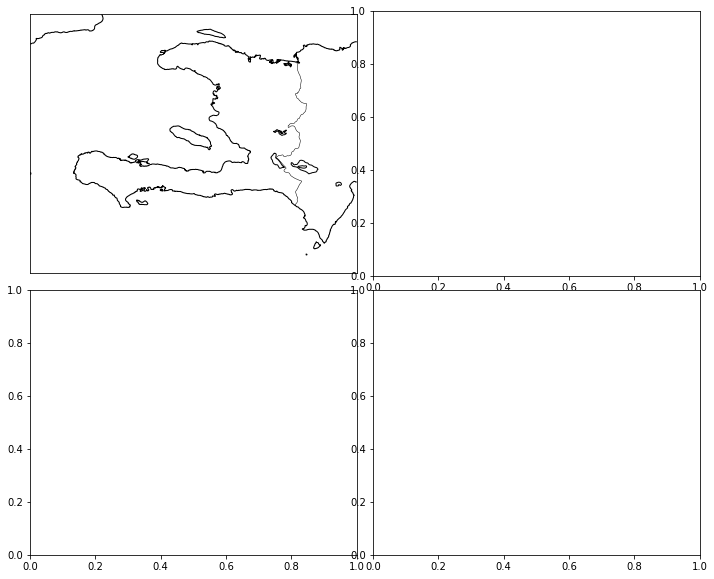

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
to_plot = ['2a', '1', '3c', '7a']
lllat=17.25;urlat=20.25;lllon=-75;urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
    cat_data = data[data['category_%s' % code] == 1]
    x,y = m(cat_data.LONGITUDE, cat_data.LATITUDE)
    m.plot(x,y, 'k', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))